https://docs.opencv22.org/4.x/dc/dc3/tutorial_py_matcher.html

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

error: OpenCV(4.5.4) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


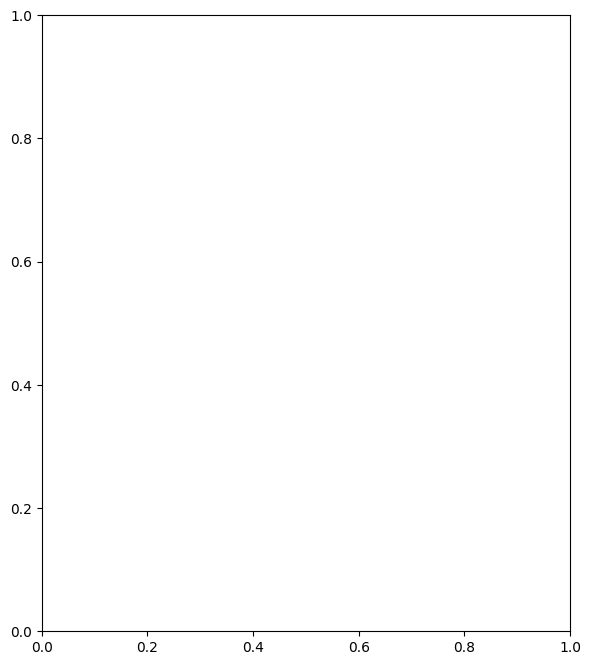

In [16]:
queryImage= 'cv2_cover.jpg'
trainImage='cv2_desk.png'

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(queryImage), cv2.COLOR_BGR2RGB))
plt.title('Query image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cv2.imread(trainImage), cv2.COLOR_BGR2RGB))
plt.title('Desk image')
plt.show()

In [19]:
# Brute-Force Matching with ORB Descriptors

queryImage = 'cv_cover.jpg'
trainImage = 'cv_desk.png'
img1 = cv2.imread(queryImage, cv2.IMREAD_GRAYSCALE)         
img2 = cv2.imread(trainImage, cv2.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv2.ORB_create()

In [20]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [21]:
# create BFMatcher object
# For binary string based descriptors like ORB, BRIEF, BRISK etc, cv.NORM_HAMMING should be used, which used Hamming distance as measurement
# `croCheck`: If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other.
bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distances.
matches = sorted(matches, key = lambda x:x.distance)


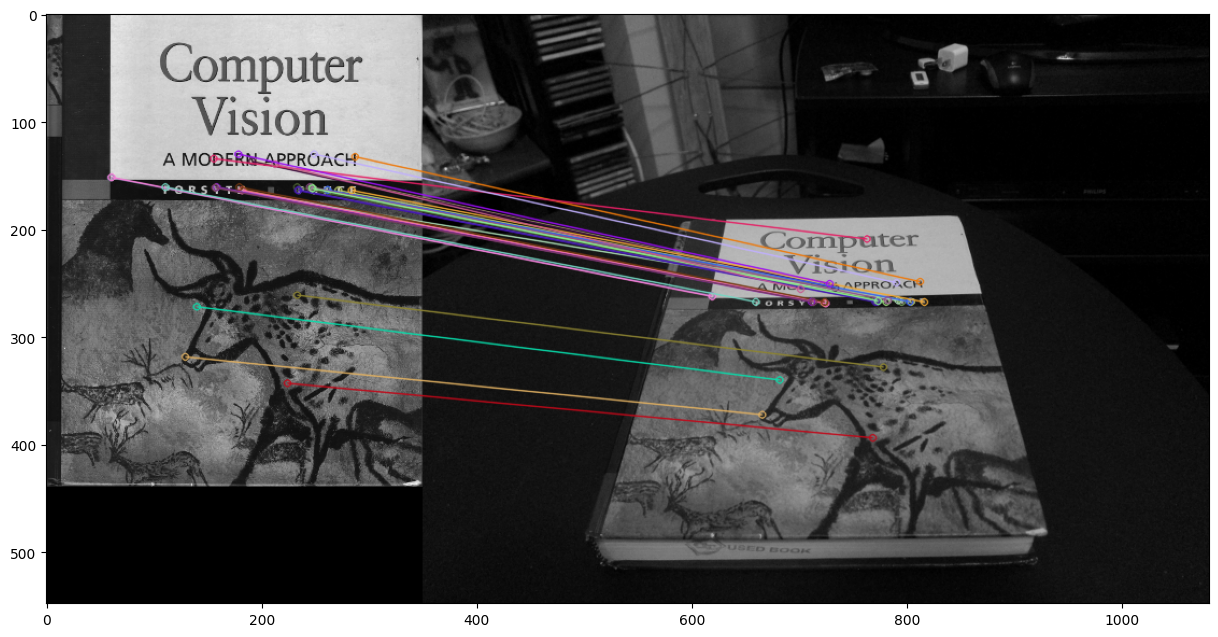

In [24]:
# Draw first 10 matches.
img3 = cv2.drawMatches(
    img1=img1,
    keypoints1=kp1,
    img2=img2,
    keypoints2=kp2,
    matches1to2=matches[: 30],
    outImg=None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

### Additional part: Find homography and warping

In [9]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv.findHomography(points1, points2, cv.RANSAC)

height, width = img2.shape

im1_warped = cv.warpPerspective(img1, h, (width, height))

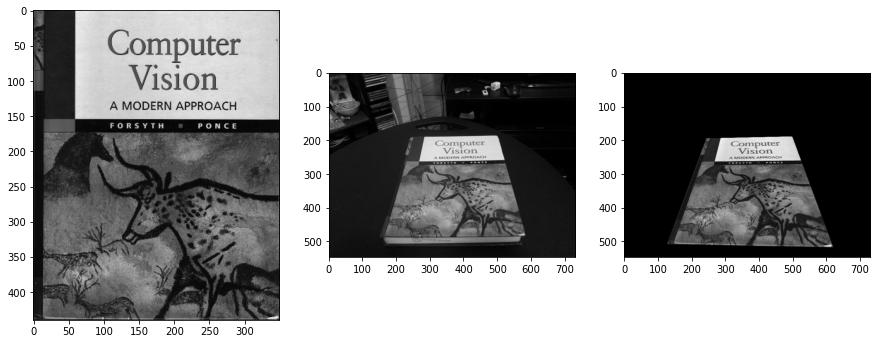

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im1_warped, cmap='gray')
plt.show()

### Extension: Brute-Force Matching with SIFT Descriptors and Ratio Test

This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that we can apply ratio test explained by D.Lowe in his paper.

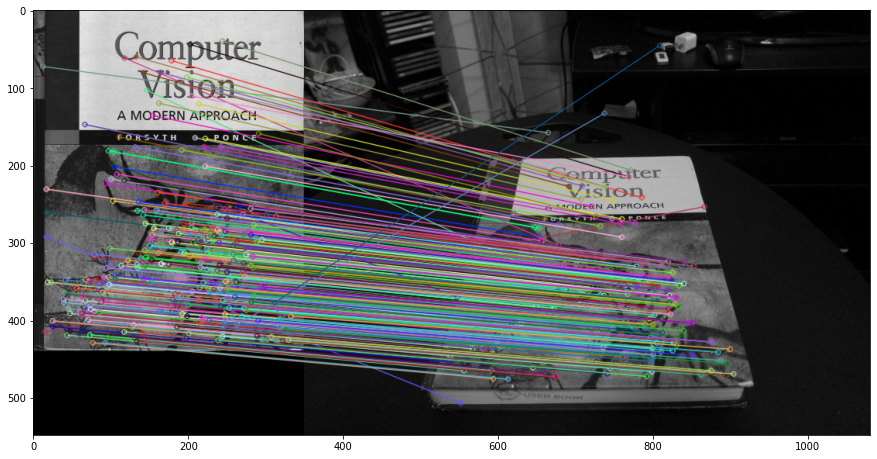

In [12]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()